# Housing affordability

Specifically, we want to look at national data and compare it with New Mexico (NM), where the case study for the story is located.

In [1]:
# importing libraries
import pandas as pd
import os

In [2]:
os.makedirs("filtered-data", exist_ok=True)

In [3]:
# filter national and New Mexico data
def filter_nm(csv, col_name):
    """
    This function creates a dataframe from a csv file,
    then filters a column to keep only the national data and rows with NM (New Mexico) identified as a state.
    
    Parameters:
    csv (str) = path of csv file
    col_name (str) = name of column to filter
    """

    df = pd.read_csv(csv)
    filtered_df = df.query(f"{col_name} == 'NM' or RegionName == 'United States'")
    filtered_df.columns = filtered_df.columns.str.strip()
    return filtered_df

In [4]:
# transpose df for charting
def chart_nm (df, drop_cols, index_col):
    """
    This function drops columns not needed for the chart
    and transposes a DataFrame.

    Parameters:
    df (pd.DataFrame) = name of dataframe
    drop_cols (list) = list of column names to drop
    index_col (str) = name of column name to set as new column headers
    """
    
    df = df.drop(columns=drop_cols, inplace=False)
    df.set_index(index_col, inplace=True)
    transposed_df = df.transpose()
    return transposed_df

In [5]:
# repeated variables

col_name = "StateName"
col_exclude = ["RegionID", "SizeRank", "RegionType", "StateName"]
index_col = "RegionName"

### New Homeowner Affordability

A measure of the share of income the median household would spend on a newly purchased home, including its mortgage payment, homeowner’s insurance, property taxes, and maintenance costs. Typically, spending more than 30% of income on housing is considered unaffordable.

In [6]:
csv = "data/Metro_new_homeowner_affordability_downpayment_0.20_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv"

df_home_afford = filter_nm(csv, col_name)
df_home_afford

,RegionID,SizeRank,RegionName,RegionType,StateName,2012-01-31,2012-02-29,2012-03-31,2012-04-30,2012-05-31,...,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31,2024-11-30,2024-12-31,2025-01-31
0,102001,0,United States,country,NaN,0.214578,0.213779,0.214812,0.214213,0.212592,...,0.362201,0.364615,0.360204,0.357528,0.347118,0.338609,0.344919,0.354805,0.351909,0.342025
61,394312,62,"Albuquerque, NM",msa,NM,0.233362,0.232325,0.233215,0.231928,0.229215,...,0.378182,0.380752,0.375752,0.372746,0.361708,0.353195,0.360453,0.371648,0.369058,0.377750
207,394773,214,"Las Cruces, NM",msa,NM,0.269650,0.268761,0.270866,0.270819,0.269046,...,0.369558,0.372382,0.367685,0.364810,0.353959,0.345378,0.352454,0.362865,0.359277,0.366555
273,395066,284,"Santa Fe, NM",msa,NM,0.304870,0.302567,0.302420,0.299142,0.294985,...,0.499227,0.503821,0.497168,0.492338,0.476063,0.462887,0.472431,0.487036,0.482287,0.492282
323,394588,342,"Farmington, NM",msa,NM,0.197017,0.196096,0.197559,0.197369,0.195972,...,0.308059,0.310333,0.306457,0.304702,0.296760,0.290509,0.297574,0.307798,0.307145,0.315258


<Axes: >

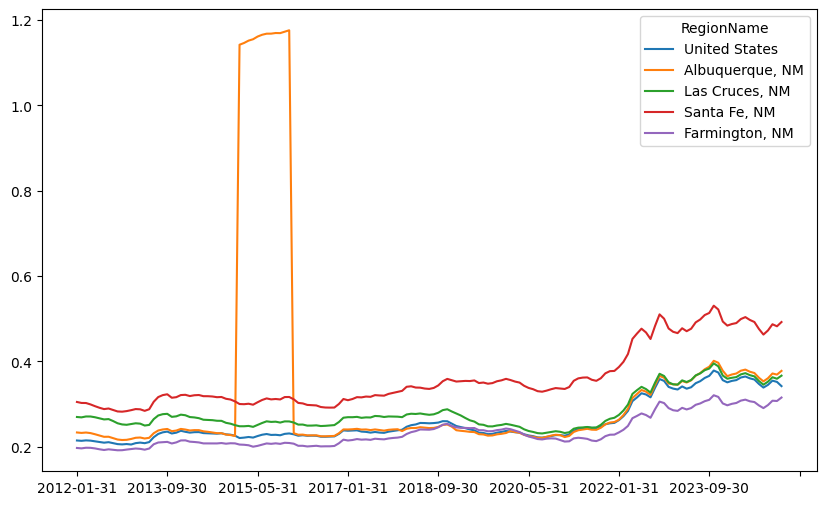

In [7]:
trans_home_afford = chart_nm(df_home_afford, col_exclude, index_col)
trans_home_afford.to_csv("filtered-data/new_homeowner_affordability.csv") # export csv

trans_home_afford.plot(kind="line", figsize=(10,6))

In [8]:
trans_home_afford.dtypes

RegionName
United States      float64
Albuquerque, NM    float64
Las Cruces, NM     float64
Santa Fe, NM       float64
Farmington, NM     float64
dtype: object

### New Homeowner Income Needed

An estimate of the annual household income required to spend less than 30% of monthly income on the total monthly payment after newly purchasing the typical home with a 20% down payment.

In [9]:
csv = "data/Metro_new_homeowner_income_needed_downpayment_0.20_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv"

df_home_income = filter_nm(csv, col_name)
df_home_income

,RegionID,SizeRank,RegionName,RegionType,StateName,2012-01-31,2012-02-29,2012-03-31,2012-04-30,2012-05-31,...,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31,2024-11-30,2024-12-31,2025-01-31
0,102001,0,United States,country,NaN,36331.546551,36264.095928,36498.720683,36455.737244,36235.541304,...,95848.490824,96745.103987,95815.409864,95340.168004,92804.245155,90796.175805,92765.798313,95710.521532,95212.655007,92538.237933
61,394312,62,"Albuquerque, NM",msa,NM,36085.353886,35946.706022,36086.928724,35887.237558,35473.038471,...,87259.344230,88087.102950,87149.227916,86667.014579,84318.834948,82576.844450,84527.033695,87413.153237,87062.918429,89113.622790
207,394773,214,"Las Cruces, NM",msa,NM,33492.785412,33396.900982,33656.372566,33645.643025,33427.750247,...,72370.012306,73117.885929,72377.322907,71990.087175,70029.895037,68533.674329,70147.776459,72436.026607,71933.809761,73390.937616
273,395066,284,"Santa Fe, NM",msa,NM,52028.832794,51748.576373,51825.594059,51364.945186,50749.409824,...,135236.994803,136846.099336,135379.089215,134397.259266,130291.530844,127058.800882,130068.170673,134490.409496,133576.538400,136345.011699
323,394588,342,"Farmington, NM",msa,NM,30413.051974,30271.890687,30487.088323,30444.995073,30220.097180,...,60860.884625,61473.998860,60858.991586,60661.001656,59233.142182,58156.387805,59749.453933,61987.443758,62040.578639,63679.225543


<Axes: >

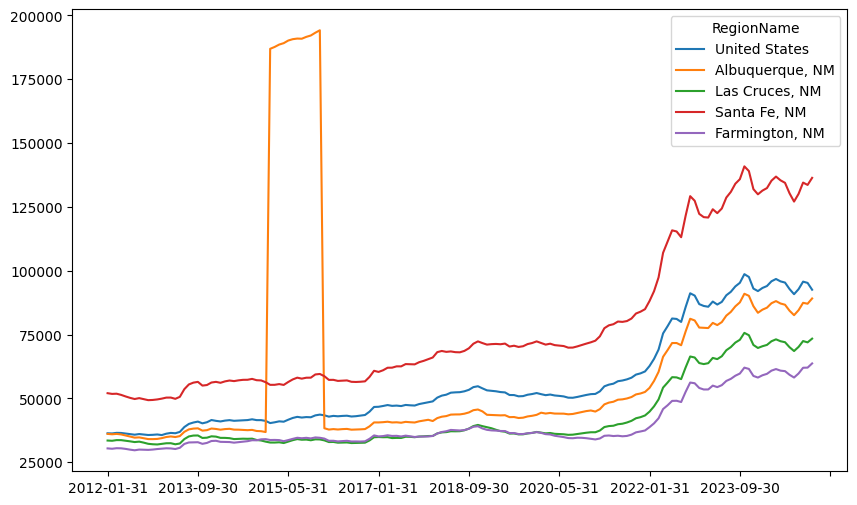

In [10]:
trans_home_income = chart_nm(df_home_income, col_exclude, index_col)
trans_home_income.to_csv("filtered-data/new_homeowner_income_needed.csv") # export csv

trans_home_income.plot(kind="line", figsize=(10,6))

### New Renter Income Needed

An estimate of the household income required to spend less than 30% of monthly income to newly lease the typical rental.

In [11]:
csv = "data/Metro_new_renter_income_needed_uc_sfrcondomfr_sm_sa_month.csv"

df_rent_income = filter_nm(csv, col_name)
df_rent_income

,RegionID,SizeRank,RegionName,RegionType,StateName,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,...,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31,2024-11-30,2024-12-31,2025-01-31
0,102001,0,United States,country,NaN,47645.047721,47863.973002,48100.713603,48294.558962,48472.317036,...,76790.510565,76943.229120,77137.462754,77315.873887,77510.983699,77729.935433,77968.241775,78247.393950,78479.908426,78721.618005
61,394312,62,"Albuquerque, NM",msa,NM,36095.926767,35985.783649,36117.374482,36254.944666,36421.239421,...,62431.549658,62338.136115,62532.204121,62614.925815,62881.228962,63078.846712,63193.557974,63162.784610,63280.946477,63487.718654
209,394773,214,"Las Cruces, NM",msa,NM,32885.945041,32698.111221,32819.944565,32965.600879,33137.966094,...,55034.606466,54979.644735,55177.256933,54928.497106,55225.651309,55341.736589,55609.492541,55484.012333,55578.668288,55663.242713
275,395066,284,"Santa Fe, NM",msa,NM,NaN,NaN,NaN,NaN,NaN,...,80476.886291,80093.406417,80221.844473,81330.811006,81778.350125,82102.788159,81892.838319,82330.349458,82500.131229,82959.976132
325,394588,342,"Farmington, NM",msa,NM,NaN,NaN,NaN,NaN,NaN,...,43805.268550,43820.756987,43943.559048,44042.042481,44092.365845,44863.474286,44365.522072,44481.584401,44376.128584,45377.777778


<Axes: >

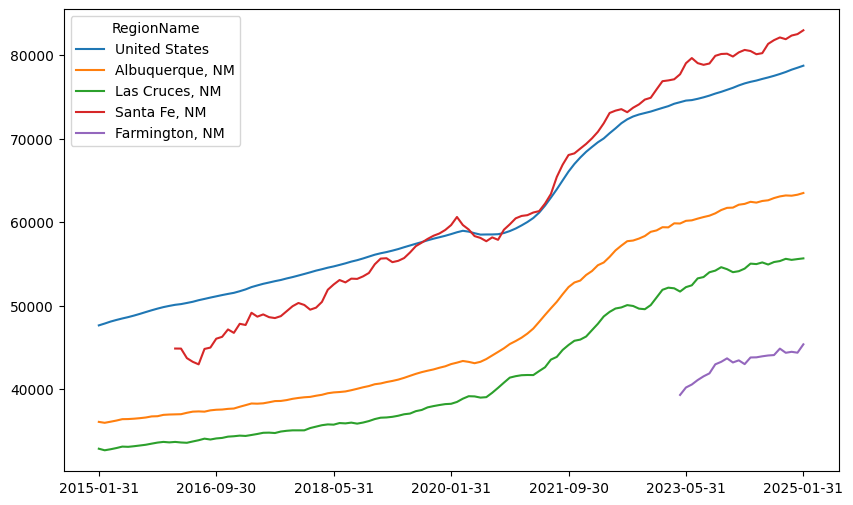

In [12]:
trans_rent_income = chart_nm(df_rent_income, col_exclude, index_col)
trans_rent_income.to_csv("filtered-data/new_renter_income_needed.csv") # export csv

trans_rent_income.plot(kind="line", figsize=(10,6))

### Years to Save

A measure of the number of years it would take the median household to save for a 20% down payment on a home, assuming they are able to save 10% of their income into a simple savings account accruing no interest. This is equivalent to the number of years it would take the median household to save for a 10% down payment, assuming a 5% savings rate.

In [13]:
csv = "data/Metro_years_to_save_downpayment_0.20_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv"

df_years_dp = filter_nm(csv, col_name)
df_years_dp

,RegionID,SizeRank,RegionName,RegionType,StateName,2012-01-31,2012-02-29,2012-03-31,2012-04-30,2012-05-31,...,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31,2024-11-30,2024-12-31,2025-01-31
0,102001,0,United States,country,NaN,6.115778,6.103630,6.101788,6.105736,6.113247,...,8.821579,8.833371,8.824976,8.806713,8.789872,8.775014,8.763037,8.748818,8.740164,8.755365
61,394312,62,"Albuquerque, NM",msa,NM,6.971276,6.954240,6.944184,6.930496,6.912249,...,9.432658,9.445290,9.428493,9.404435,9.388190,9.387058,9.388183,9.388890,9.393509,9.430471
207,394773,214,"Las Cruces, NM",msa,NM,8.742560,8.731427,8.749476,8.783122,8.814074,...,9.321909,9.342111,9.331989,9.310835,9.296611,9.294583,9.292338,9.274645,9.250837,9.252966
273,395066,284,"Santa Fe, NM",msa,NM,10.199911,10.143625,10.076111,10.002969,9.964209,...,13.126022,13.172426,13.156602,13.104400,13.054474,13.027948,13.013273,12.987934,12.960837,12.958377
323,394588,342,"Farmington, NM",msa,NM,6.345185,6.327759,6.338457,6.357604,6.376519,...,7.831087,7.845570,7.838870,7.838957,7.860562,7.887441,7.915619,7.937635,7.983962,8.035420


<Axes: >

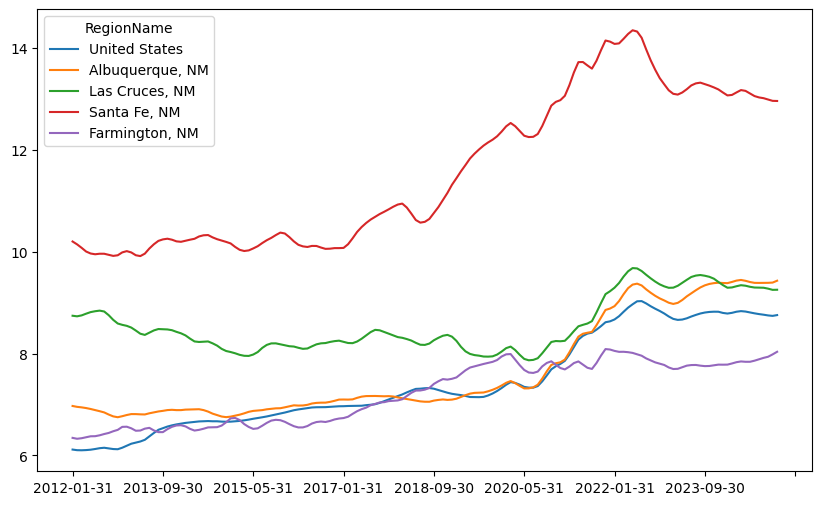

In [14]:
trans_years_dp = chart_nm(df_years_dp, col_exclude, index_col)
trans_years_dp.to_csv("filtered-data/years_to_save_dp.csv") # export csv

trans_years_dp.plot(kind="line", figsize=(10,6))